# NDVI calculation Function with plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import rioxarray as rxr
import earthpy.spatial as es
import earthpy.plot as ep

## M1: NDVI Calculation with seperate red & nir .tiff files

### 1.1 Function

* Red file, & nir file were used as input paramters  
* NDVI value is return as 2D matrix

In [2]:
img_path = './Data/Test1'
red_file = '2022-08-15-00_00_2022-08-15-23_59_Sentinel-2_L2A_B04_(Raw).tiff'
nir_file = '2022-08-15-00_00_2022-08-15-23_59_Sentinel-2_L2A_B08_(Raw).tiff'

# read the both .tiff files for red(B04) & nir (B08)
red = rxr.open_rasterio(img_path+'/'+red_file)
nir = rxr.open_rasterio(img_path+'/'+nir_file)

In [3]:
def ndvi_cal(red,nir):
    ndvi = es.normalized_diff(nir[0], red[0])
    
    # plot the results
    ep.plot_bands(ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Sentinel2 L2C Derived NDVI")
    plt.show()
    
    return ndvi    

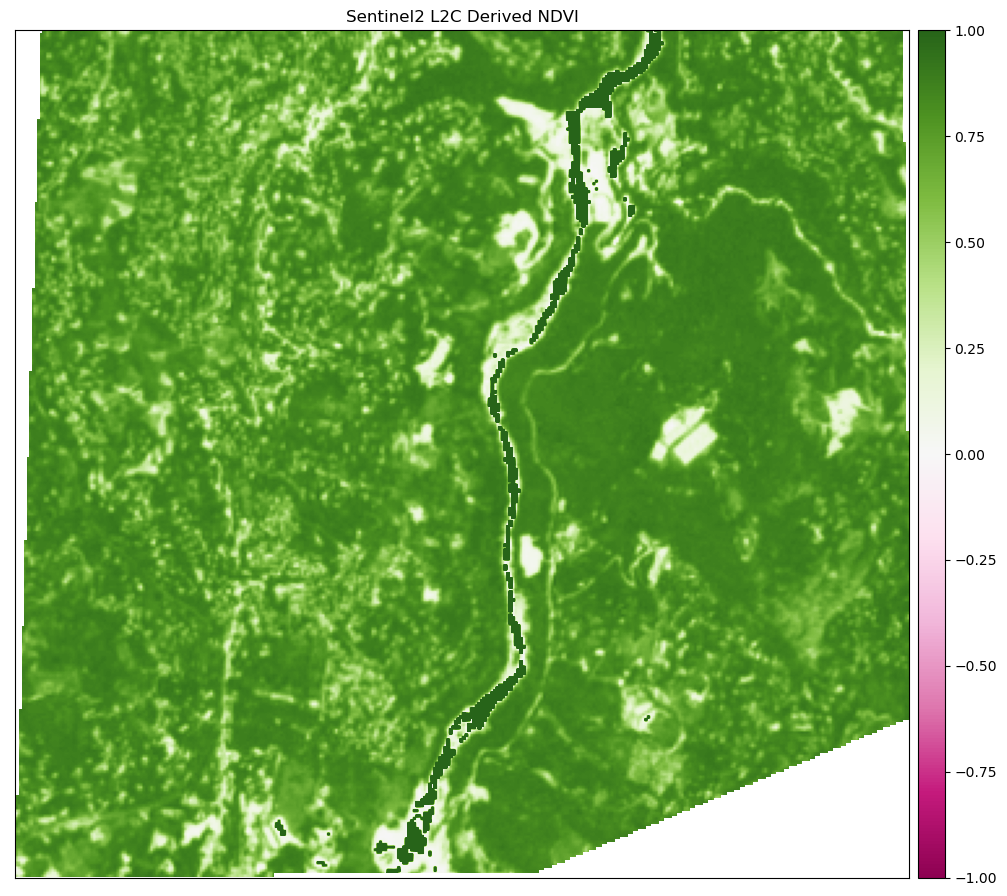

masked_array(
  data=[[--, --, --, ..., 0.8852459016393442, --, --],
        [--, --, --, ..., 0.8962962962962963, --, --],
        [--, --, --, ..., 0.9097744360902256, --, --],
        ...,
        [0.047619047619047616, 0.11578947368421053, 0.2857142857142857,
         ..., --, --, --],
        [0.12195121951219512, 0.12087912087912088, 0.17391304347826086,
         ..., --, --, --],
        [0.3617021276595745, 0.24731182795698925, 0.3404255319148936,
         ..., --, --, --]],
  mask=[[ True,  True,  True, ..., False,  True,  True],
        [ True,  True,  True, ..., False,  True,  True],
        [ True,  True,  True, ..., False,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=1e+20)

In [4]:
ndvi_cal(red,nir)

## M3: NDVI with red & NIR arrays